# Hierarchical Clustering
Author: Nico Kuijpers  
Date: March 28, 2021

## Introduction
Hierarchical clustering is one of the machine learning algorithms that can be applied for unsupervised learning. In this notebook we give an example of how to apply agglomerative clustering on the Iris dataset.

First import the libraries we need.

In [42]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.16.2
pandas version: 0.24.2
scikit-learn version: 0.24.1
seaborn version: 0.9.0
matplotlib version: 3.0.3


## The unsupervised learning classification steps: overview

This notebook implements all specific tasks in applying unsupervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm, 
* and Evaluating its results.

Note that for unsupervised learning, we skip the step 'Dividing your data in a training and test set'.

## Step 1: Preparing the data
To illustrate hierarchical clustering we use the Iris dataset. The dataset consists of 149 entries, 4 input features, and 1 output label. The data set consists of about 50 samples from each of three species of Iris: Iris setosa, Iris virginica, and Iris versicolor. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

During clustering, we ignore the labels (unsupervised learning). We can compare the results of clustering with the labels afterwards. 

For more information on the Iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set

### Download the dataset

In [43]:
# Download the Iris dataset from the internet
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

### Explore the dataset
Get a first impression of the dataset by printing the data format and showing the first 5 rows and last 5 rows
of the DataFrame.

In [44]:
# Explore the Iris dataset
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [45]:
df_iris.tail(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


Print the different species in the dataset.

In [46]:
print(df_iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Print the number of flowers for each species and visualize these numbers using a bar plot.

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64


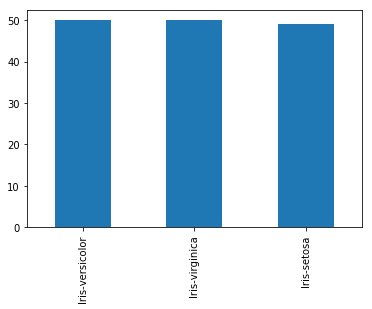

In [47]:
print(df_iris['Species'].value_counts())
df_iris['Species'].value_counts().plot(kind='bar')

Method `pandas.DataFrame.info()` prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html.

In [48]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
Sepal Length    149 non-null float64
Sepal Width     149 non-null float64
Petal Length    149 non-null float64
Petal Width     149 non-null float64
Species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Method `pandas.DataFrame.describe()` generates descriptive statistics. These include central tendency, dispersion,
and shape of a dataset's distribution, excluding NaN values. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [49]:
df_iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 2: Analysing and visualising the data


Analyse the dataset using a box-and-whisker plot generated by method `pandas.DataFrame.boxplot()`. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
    
For more information on box plots, see https://en.wikipedia.org/wiki/Box_plot

From the box plot below, it can be observed that for Sepal Length and Sepal Width, 
there is some overlap in values for the three different species. Petal Length and
Petal Width show less overlap. This information may be useful when selecting features.

**Note**: by default, the box plot will be partly shown and a scroll bar appears. To view the 
entire box plot, select Cell &#8594; All Output &#8594; Toggle Scrolling.

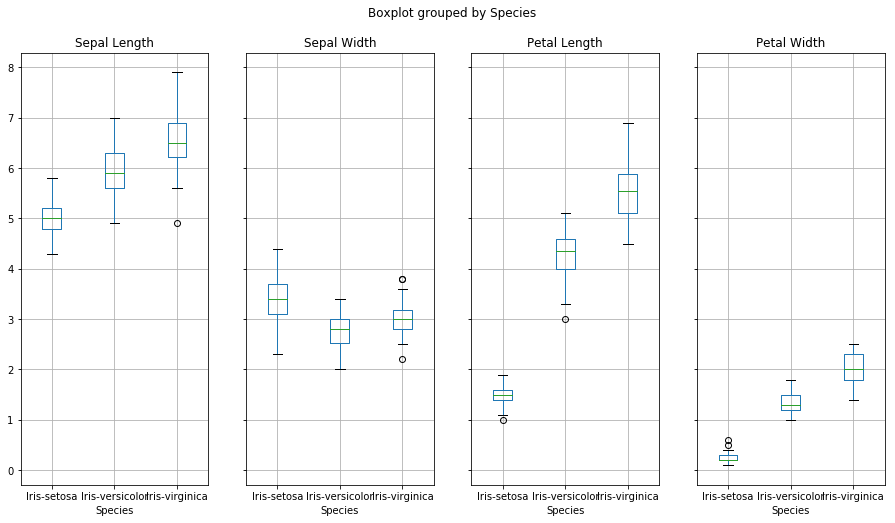

In [50]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species', figsize=(15,8), layout=(1,4));

Plot pairwise relationships using method `seaborn.pairplot`. 
See https://seaborn.pydata.org/generated/seaborn.pairplot.html

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x576 with 0 Axes>

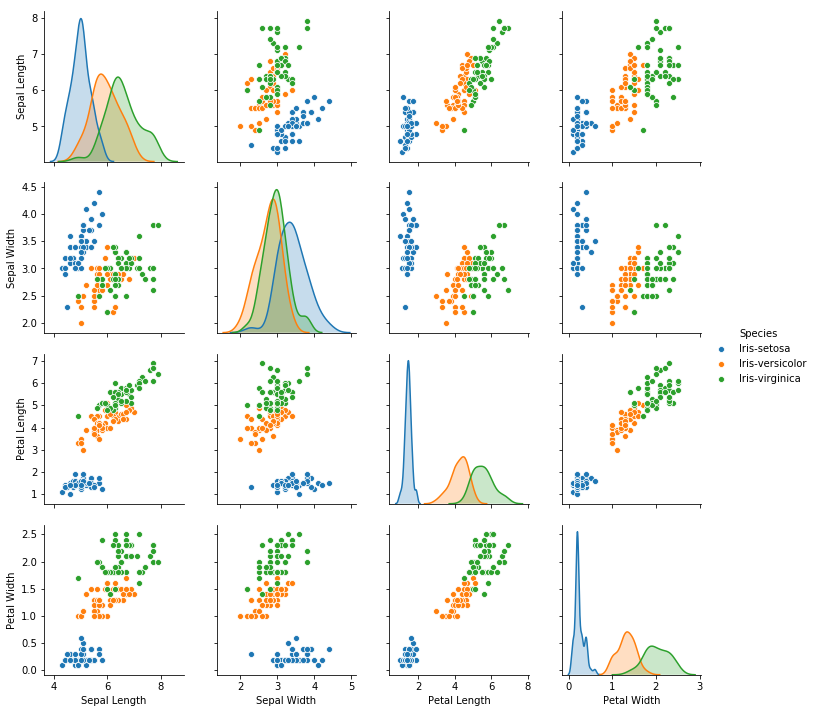

In [51]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris, hue='Species')
plt.show

## Step 3: Cleaning the data
There is no need to clean the data.

## Step 4:  Selecting the features
Use all 4 features for clustering. 
From the box plots it can be observed that the values range between 0 and 8 cm and that the distribution 
differs per feature. 
For instance, Sepal Length ranges between 4 and 8 cm, while Petal Width ranges between 0 and 3 cm. 
When applying K-means clustering it is important to normalize the data. Using the `StandardScaler`, 
the standard score of a sample $x$ is calculated as $z=(x-u)/s$, where $u$ is the mean and $s$ is 
the standard deviation.

In [52]:
from sklearn.preprocessing import StandardScaler

# Define X_iris and y_iris

# Use this line to select all four features
#X_iris = df_iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]

# Use this line to select Sepal Length and Sepal Width
#X_iris = df_iris[['Sepal Length', 'Sepal Width']]

# Use this line to select Petal Length and Petal Width
X_iris = df_iris[['Petal Length', 'Petal Width']]

# Note that we will not use y_iris during clustering
y_iris = df_iris['Species']
print('Iris types:', y_iris.unique())

# Normalize the data
scaler_iris = StandardScaler().fit(X_iris)
X_iris_normalized = scaler_iris.transform(X_iris)
print('The length of X_iris_normalized: ', len(X_iris))


Iris types: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The length of X_iris_normalized:  149


Visualize the distribution of the data per feature after normalization.

Number of selected features:  2


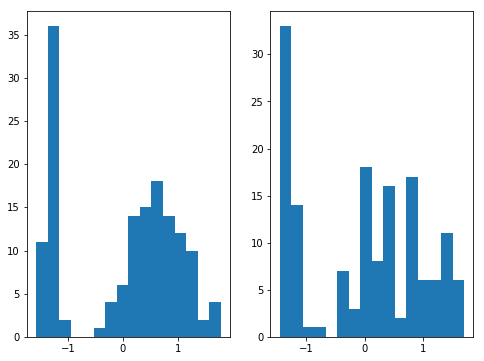

In [53]:
# Define number of bins for histogram
nbins = 16

# Number of selected features
nfeatures = len(X_iris.columns)
print('Number of selected features: ',nfeatures)

# Plot histograms for each of the selected features
fig, axs = plt.subplots(1,nfeatures,figsize=(nfeatures*4,6))
for f in range(nfeatures):
    axs[f].hist(X_iris_normalized[:,f],nbins)

## Step 5: Training your machine learning algorithm
To perform hierarchical clustering, we use `sklearn.cluster.AgglomerativeClustering`. 

See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Define number of clusters by setting distance threshold
agglom = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
#agglom = AgglomerativeClustering(distance_threshold=10, n_clusters=3)

# Use this line for agglomerative clustering using normalized data
agglom.fit(X_iris_normalized)

# Use this line for agglomerative clustering with original data (not normalized)
#agglom.fit(X_iris)

ValueError: Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.

Number of clusters found by the algorithm. If parameter `distance_threshold=None`, it will
be equal to the given `n_clusters`.

In [ ]:
print('Number of clusters: ',agglom.n_clusters_)

Cluster labels are stored in an ndarray of shape (n_samples).

In [ ]:
print(np.unique(agglom.labels_))

Number of leaves in the hierarchical tree.

In [ ]:
print(agglom.n_leaves_)

In [ ]:
print(agglom.distances_)

In [ ]:
plt.hist(agglom.distances_,30)

Plot hierarchical clustering dendrogram.

The code below is adapted from
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agglom, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Step 6: Applying your machine learning algorithm
For each datapaint, add the cluster to the original Iris data set.

In [ ]:
df_iris['Cluster'] = agglom.labels_.astype(str)
df_iris['Cluster'] = 'Cluster ' + df_iris['Cluster']
df_iris.head(5)

In [ ]:
df_iris.tail(5)

Plot pairwise relationships per species and per cluster using method `seaborn.pairplot`. 

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]], hue="Species")
plt.show

plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Cluster"]], hue="Cluster")
plt.show

## Step 7: Evaluating the results
If clustering is successful, one may expect that flowers of the same species end up in the same cluster.
Let us check whether this is the case.

Code for the bar plot is adapted from
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [ ]:
# Define labels for species
species = df_iris['Species'].unique()

# Define labels for clusters
clusters = df_iris['Cluster'].unique()

# Sort cluster names in alphabetical order, i.e.,
# Cluster 0, Cluster 1, Cluster 2, etc.
clusters.sort()

# Determine the location for cluster labels 
x = np.arange(len(clusters))

# Define the width of the bars
width = 0.25

# Create the bar plot
fig, ax = plt.subplots()
offset = -width
for spec in species:
    nr_occurrences = []
    for clus in clusters:
        nr = df_iris[(df_iris['Species']==spec) & (df_iris['Cluster']==clus)]['Cluster'].count()
        nr_occurrences.append(nr)
    rects = ax.bar(x + offset, nr_occurrences, width, label=spec)
    offset = offset + width

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences in cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
print(df_iris['Species'].value_counts())
print(df_iris['Cluster'].value_counts())

species = df_iris['Species'].unique()
for spec in species:
    print('Number of samples per cluster for',spec)
    print(df_iris[df_iris['Species']==spec]['Cluster'].value_counts())

## Appendix A: The effect of normalization before clustering
Change the code in Step 5 such that `X_iris` is used instead of `X_iris_normalized` when
applying `AgglomerativeClustering`.
Rerun all cells above and compare the results after clustering (Step 6 and Step 7). 
Note that you should not compare the values of `agglom.distances_`, because the
distances change with normalization.

## Appendix B: Feature selection (revisited)
In Step 4, all four features in the dataset were selected for clustering. 
However, when looking at the box plot in Step 3, one may observe that the values for 
Petal Length and Petal Width are more distinctive per species compared to Sepal Length and Sepal Width.
Go back to Step 4 and select Sepal Length and Sepal Width as features for clustering.
Do the same for Petal Length and Petal Width. Compare the results after clustering.
You can simply change the line of code and then choose Cell &#8594; Run All.